In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [4]:
import tensorflow as tf
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

219070464/219055592 [==============================] - 6s 0us/step
time: 24.5 s (started: 2022-03-01 14:49:55 +00:00)


In [5]:
from keras.models import load_model
import pandas as pd



# load model
model = load_model('drive/MyDrive/NoteBook/Test_Train_Val/model_Def_best_2102.h5')
class_df_T = pd.read_csv('drive/MyDrive/NoteBook/Test_Train_Val/class_df_T.csv')  
df_test = pd.read_csv('drive/MyDrive/NoteBook/Test_Train_Val/df_test.csv')


time: 22.5 s (started: 2022-03-01 14:50:19 +00:00)


In [6]:
from tqdm import tqdm
import os
import cv2
import numpy as np

image_location = 'drive/MyDrive/NoteBook/Test_Train_Val/test'

file_list=os.listdir(image_location)  # list of files
len(file_list)

4682

time: 420 ms (started: 2022-03-01 14:50:49 +00:00)


In [11]:
from google.colab.patches import cv2_imshow

#_path=os.path.join(image_location, f)  # create the path to the image file
def showAndPredict(image_location):
  img=cv2.imread(image_location)    # read in the image - note cv2 reads in images in BGR format
  cv2_imshow(img)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # model was trained on RGB images so convert to RGB
  img=cv2.resize(img, (128,128)) # model was trained on images of size 128  X 128 X 3 so resize the images
  img=img/255 # model was trained with pixel value scalled between -1 to +1 so convert the pixel range    
  img=np.expand_dims(img, axis=0) # model predict expects the input to have dimension (batch_size, width, height, bands)
  prediction =model.predict (img, batch_size=1, verbose=0) # make predictions    
  pred=np.argmax(prediction)# find the index of the column with the highest probability
  pred_1 = str(class_df_T.loc[class_df_T['ref_idx'] == pred]["race"][pred])
  print ('/ Predicted ---> ', pred_1 )
  print (' / Idx ---> ' , pred)
  print ( ' / Proba----> ', prediction[0][pred]  )

time: 32.5 ms (started: 2022-03-01 14:59:47 +00:00)


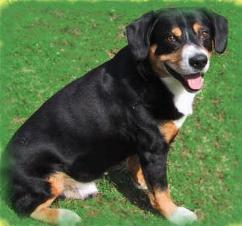

/ Predicted --->  EntleBucher
 / Idx --->  22
 / Proba---->  0.9514611
time: 273 ms (started: 2022-03-01 15:00:07 +00:00)


In [12]:
image_location = 'drive/MyDrive/NoteBook/Base_train_test_1000/50_photos/EntleBucher___16939.jpg'
showAndPredict(image_location)

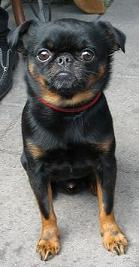

/ Predicted --->  Brabancon_griffon
 / Idx --->  13
 / Proba---->  0.5095108
time: 516 ms (started: 2022-03-01 15:00:42 +00:00)


In [13]:
image_location = 'drive/MyDrive/NoteBook/Base_train_test_1000/50_photos/Brabancon_griffon___10400.jpg'
showAndPredict(image_location)

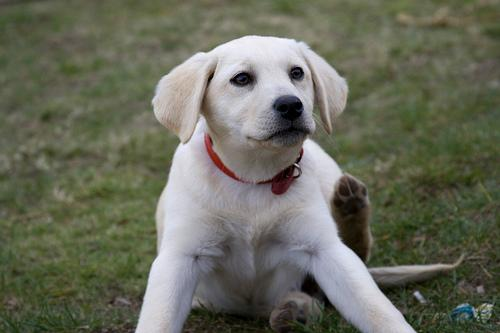

/ Predicted --->  Labrador_retriever
 / Idx --->  38
 / Proba---->  0.9999436
time: 567 ms (started: 2022-03-01 15:02:13 +00:00)


In [14]:
image_location = 'drive/MyDrive/NoteBook/Base_train_test_1000/50_photos/Labrador_retriever___14789.jpg'
showAndPredict(image_location)

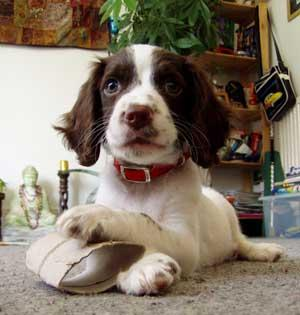

/ Predicted --->  English_springer
 / Idx --->  21
 / Proba---->  1.0
time: 606 ms (started: 2022-03-01 15:02:33 +00:00)


In [15]:
image_location = 'drive/MyDrive/NoteBook/Base_train_test_1000/50_photos/English_springer___7832.jpg'
showAndPredict(image_location)

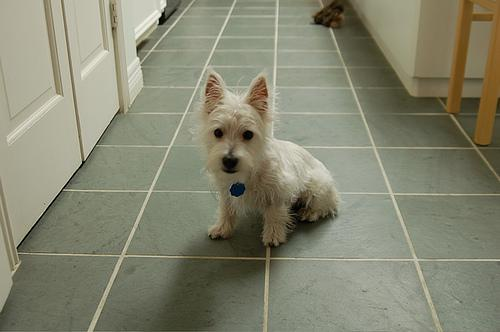

/ Predicted --->  cairn
 / Idx --->  79
 / Proba---->  0.8936964
time: 854 ms (started: 2022-03-01 15:02:54 +00:00)


In [16]:
image_location = 'drive/MyDrive/NoteBook/Base_train_test_1000/50_photos/West_Highland_white_terrier___7473.jpg'
showAndPredict(image_location)